In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [3]:
prev_dataset= pd.read_csv('MHS1.csv', encoding= 'cp1252')

In [4]:
prev_dataset.head()

,Choose one from below:,Which age group do you belong to?,Occupation:,What is your relationship status?,Have you ever tried counseling or gotten help for a mental health issue?,Do you take any medications? If yes please name them below,Would you agree that most days are stressful when you consider the level of stress in your life?,"In general, would you say your physical health is?","Have you been diagnosed or seen a professional (psychiatrist, doctor, family doctor, Pediatrician, therapist, or counsellor etc.) for your mental health condition?",What was the reason why you saw this professional?,...,How did those challenges affect you?,Do you have any stress in your life?,How would you explain the level of stress in your life lately?,"In your opinion, what is the cause of that stress and how does it affect you ?","Beside your mental wellness, how does it affect your physical health?",What makes you happy ?,How did you approached any professional before?,"We are giving away a gift card to one of the Lucky Winners who are participating in this survey and helping us. So, Please provide your email address if you wish to enter into the contest:",Provide us your Initials of Name,How do you identify as:
0,Male,26-30,Student,Married,No,no,4,2,No,because so many people suffering with this pro...,...,I have no experience,Yes,50 out of 100,when I was sleeping suddenly I wake up,I never concentrate on my daily exercise,watching Movies,NaN,NaN,NaN,NaN
1,Male,21-25,Student,Single,No,NaN,2,2,Yes,I was unable to concentrate,...,I was not feeling well for 2 days,Yes,Sometimes I feel stressed with hectic schedule,I dont feel good talking to anyone,NaN,Spending time with Friends and Family,NaN,NaN,NaN,NaN
2,Male,26-30,Student,In a Relationship,No,No,1,2,No,A physical pain,...,NaN,Yes,Normal,"I came to a new country, I need to learn a new...",I feel that I do not have time to take care of...,"Living in a free country, living by myself ear...",Walk-In,NaN,NaN,NaN
3,Female,31-35,Employed,Married,No,NaN,3,4,No,NaN,...,Left a scar in me,Yes,Normal,Meeting basic life needs,NaN,Improve life form all aspects,NaN,"NA, thank you",NaN,NaN
4,Female,26-30,Student,Married,No,No,3,3,No,No,...,Emotional,Yes,Study stress,My study is hard and m international student i...,Some time,Music,No,yashuch786@gmail.com,NaN,NaN


In [5]:
orginal_columns = prev_dataset.columns

In [6]:
columns = ['gender', 'age','employment_status', 'marrital_status','counselling','medication','stress_level','physical_health_level','visited','reason_visited','current_mood','events','main_symptoms','family_history','family_relation','family_support','other_info','traumatic_event','feeling_anxious','tools','others_anxiety','happy_things','therapy_purpose','employeed_sector','feeling_today','time_period','urgency_scale','sucidal','affect','stress','stress_level1','stress_cause','physical_health','happy_reason','past_therapy','email','name','race']

In [18]:
from pandas_profiling import ProfileReport

report = ProfileReport(prev_dataset)
report.to_file("auto_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
prev_dataset.columns = columns

# EDA

In [8]:
prev_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 26 non-null     object
 1   age                    26 non-null     object
 2   employment_status      26 non-null     object
 3   marrital_status        26 non-null     object
 4   counselling            26 non-null     object
 5   medication             20 non-null     object
 6   stress_level           26 non-null     int64 
 7   physical_health_level  26 non-null     int64 
 8   visited                26 non-null     object
 9   reason_visited         15 non-null     object
 10  current_mood           19 non-null     object
 11  events                 17 non-null     object
 12  main_symptoms          19 non-null     object
 13  family_history         25 non-null     object
 14  family_relation        6 non-null      object
 15  family_support         7 

In [9]:
prev_dataset.isna().sum()

gender                    0
age                       0
employment_status         0
marrital_status           0
counselling               0
medication                6
stress_level              0
physical_health_level     0
visited                   0
reason_visited           11
current_mood              7
events                    9
main_symptoms             7
family_history            1
family_relation          20
family_support           19
other_info               13
traumatic_event           8
feeling_anxious           2
tools                    11
others_anxiety           14
happy_things             10
therapy_purpose          14
employeed_sector         14
feeling_today             0
time_period               1
urgency_scale             0
sucidal                   0
affect                   13
stress                    0
stress_level1             7
stress_cause              5
physical_health          10
happy_reason              2
past_therapy              7
email               

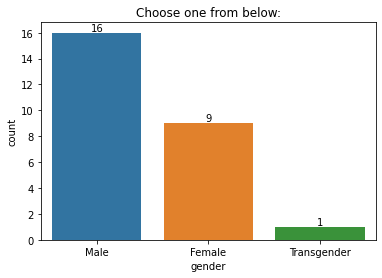

In [10]:
ax = sns.countplot('gender', data =prev_dataset)
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('gender')])
plt.show()

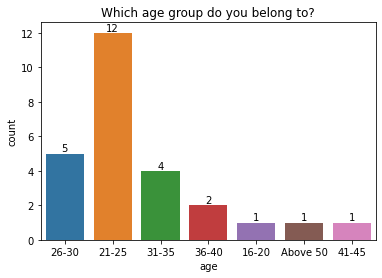

In [11]:
ax = sns.countplot('age', data =prev_dataset)
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('age')])
plt.show()

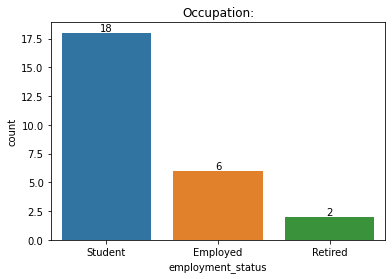

In [12]:
ax = sns.countplot('employment_status', data =prev_dataset)
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('employment_status')])
plt.show()

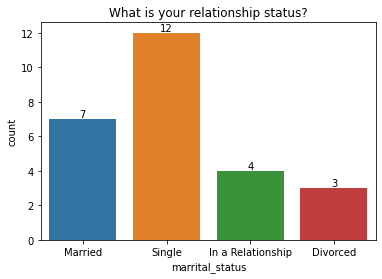

In [13]:
ax = sns.countplot('marrital_status', data =prev_dataset)
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('marrital_status')])
plt.show()

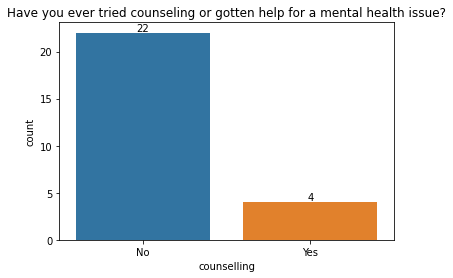

In [14]:
ax = sns.countplot('counselling', data =prev_dataset)
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('counselling')])
plt.show()

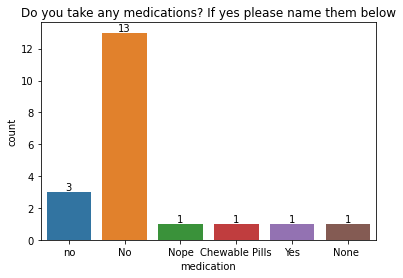

In [15]:
ax = sns.countplot('medication', data =prev_dataset)
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('medication')])
plt.show()

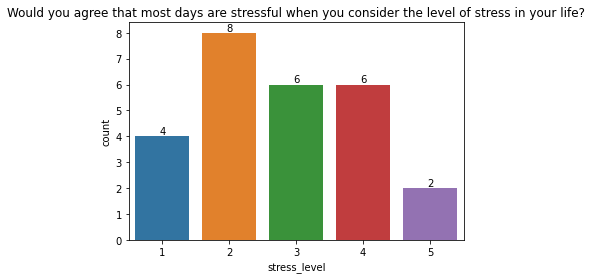

In [16]:
ax = sns.countplot('stress_level', data =prev_dataset)
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('stress_level')])
plt.show()

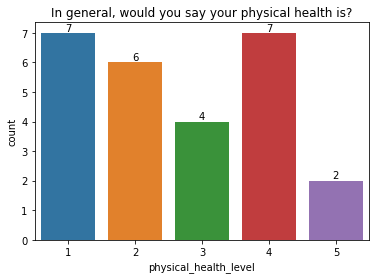

In [17]:
ax = sns.countplot('physical_health_level', data =prev_dataset)
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('physical_health_level')])
plt.show()

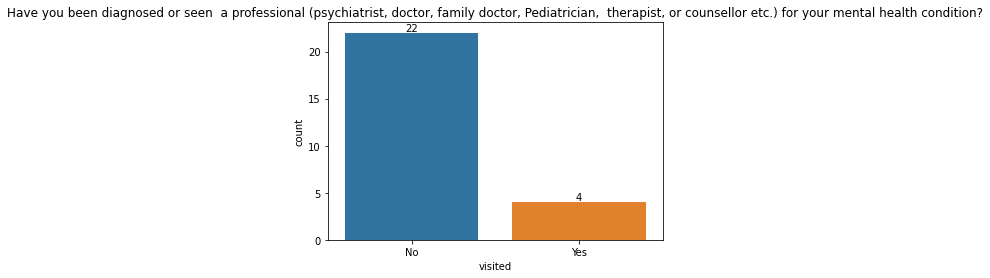

In [18]:
ax = sns.countplot('visited', data =prev_dataset)
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('visited')])
plt.show()

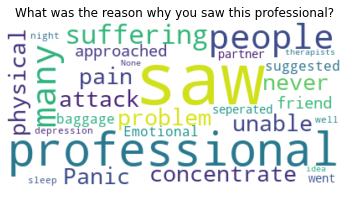

In [19]:
# word cloud
text = " ".join(text for text in prev_dataset['reason_visited'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('reason_visited')])
plt.axis("off")
plt.show()

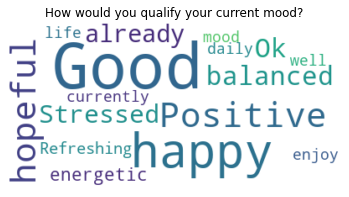

In [20]:
# word cloud
text = " ".join(text for text in prev_dataset['current_mood'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('current_mood')])
plt.axis("off")
plt.show()

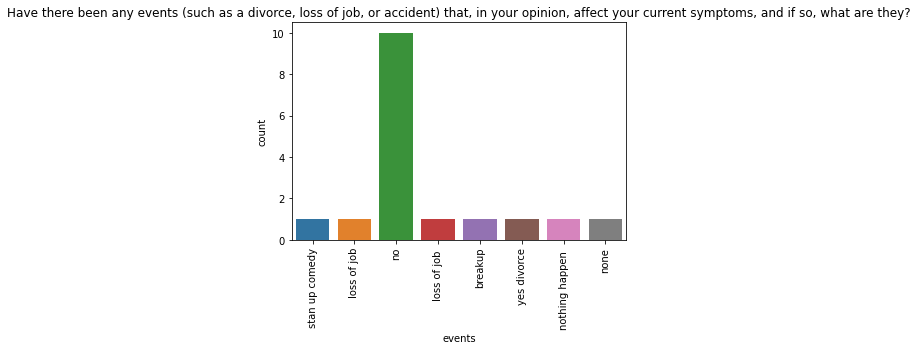

In [21]:
chart = sns.countplot(prev_dataset.events.dropna().apply(lambda x: x.lower()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(orginal_columns[columns.index('events')])
plt.show()

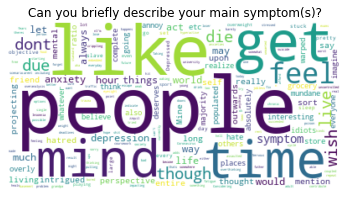

In [22]:
# wordcloud
text = " ".join(text for text in prev_dataset['main_symptoms'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('main_symptoms')])
plt.axis("off")
plt.show()

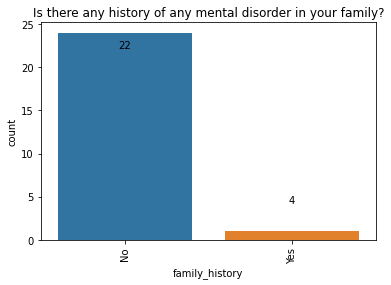

In [23]:
chart = sns.countplot('family_history', data =prev_dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('family_history')])
plt.show()

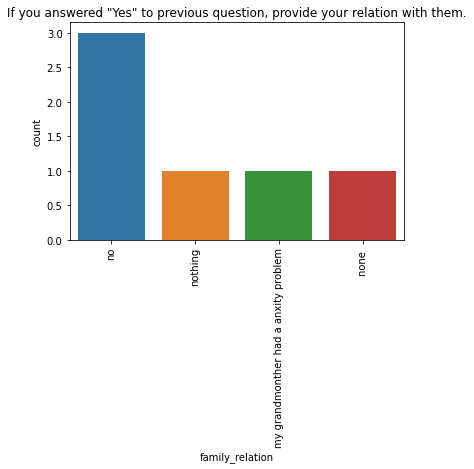

In [24]:
chart = sns.countplot(prev_dataset.family_relation.dropna().apply(lambda x: x.lower()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('family_relation')])
plt.show()

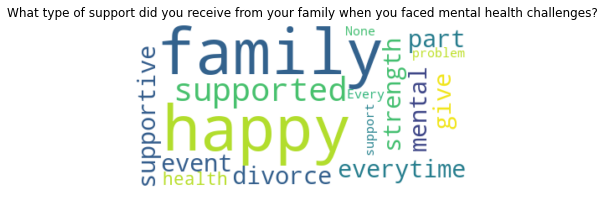

In [25]:
text = " ".join(text for text in prev_dataset['family_support'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('family_support')])
plt.axis("off")
plt.show()

Have you ever experienced a terrible occurrence that has impacted you significantly? Examples may include being the victim of armed assault, witnessing a tragedy happen to someone else, surviving a sexual assault, or living through a natural disaster, suicide, substance abuse etc.


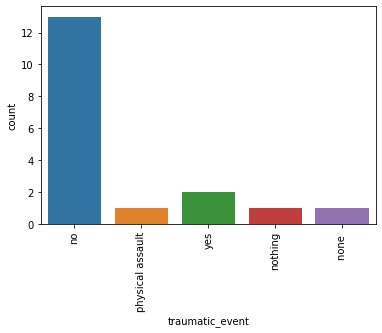

In [26]:
print(orginal_columns[columns.index('traumatic_event')])
chart = sns.countplot(prev_dataset.traumatic_event.dropna().apply(lambda x: x.lower()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

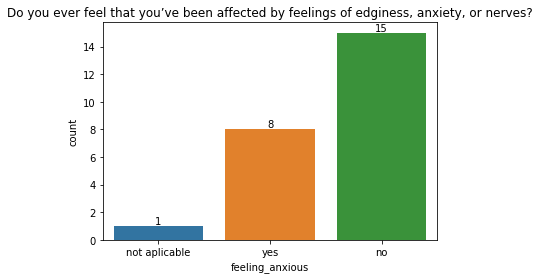

In [27]:
ax = sns.countplot(prev_dataset.feeling_anxious.dropna().apply(lambda x: x.lower()))
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('feeling_anxious')])
plt.show()

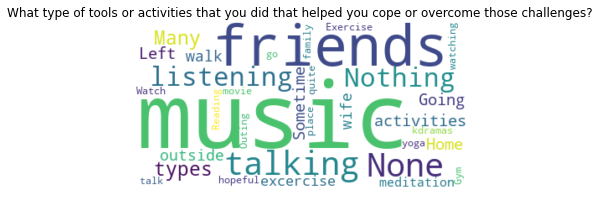

In [28]:
text = " ".join(text for text in prev_dataset['tools'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('tools')])
plt.axis("off")
plt.show()

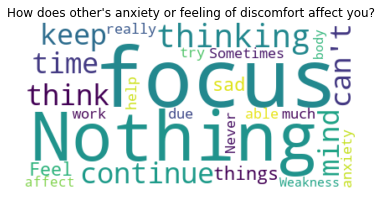

In [29]:
text = " ".join(text for text in prev_dataset['others_anxiety'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('others_anxiety')])
plt.axis("off")
plt.show()

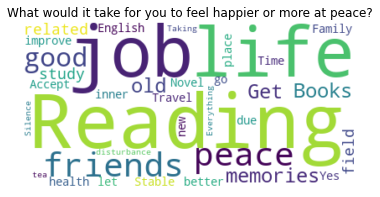

In [30]:
text = " ".join(text for text in prev_dataset['happy_things'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('happy_things')])
plt.axis("off")
plt.show()

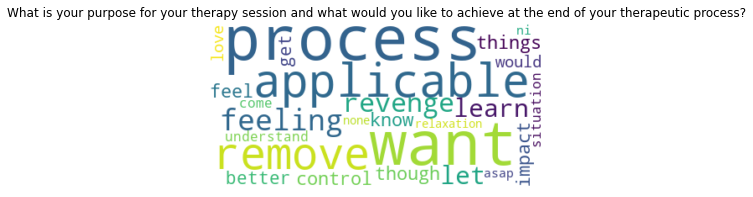

In [31]:
text = " ".join(text.lower() for text in prev_dataset['therapy_purpose'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('therapy_purpose')])
plt.axis("off")
plt.show()

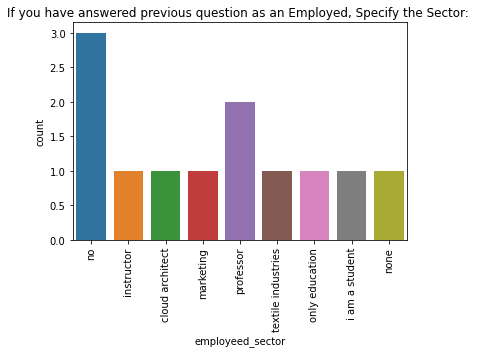

In [32]:
chart = sns.countplot(prev_dataset.employeed_sector.dropna().apply(lambda x: x.lower())) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(orginal_columns[columns.index('employeed_sector')])
plt.show()

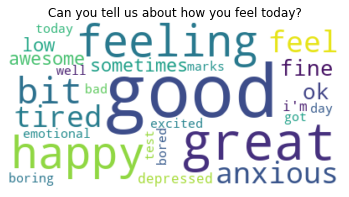

In [33]:
text = " ".join(text.lower() for text in prev_dataset['feeling_today'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('feeling_today')])
plt.axis("off")
plt.show()

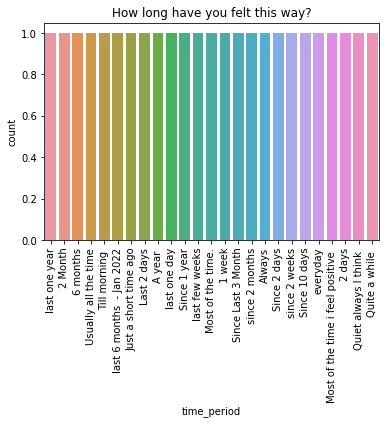

In [34]:
chart = sns.countplot('time_period', data =prev_dataset) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(orginal_columns[columns.index('time_period')])
plt.show()

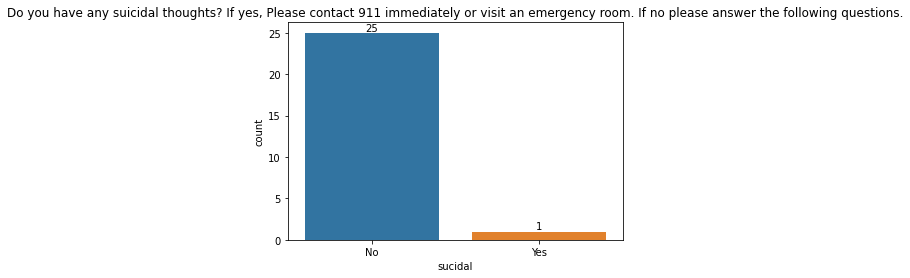

In [35]:
ax = sns.countplot('sucidal', data =prev_dataset) 
ax.bar_label(ax.containers[0])
plt.title(orginal_columns[columns.index('sucidal')])
plt.show()

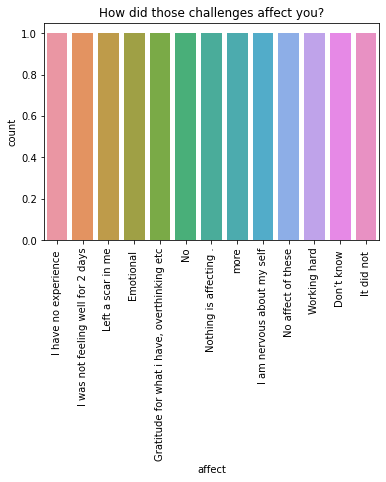

In [36]:
chart = sns.countplot('affect', data =prev_dataset) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(orginal_columns[columns.index('affect')])
plt.show()

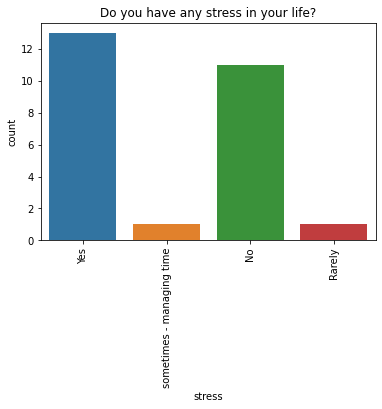

In [37]:
chart = sns.countplot('stress', data =prev_dataset) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(orginal_columns[columns.index('stress')])
plt.show()

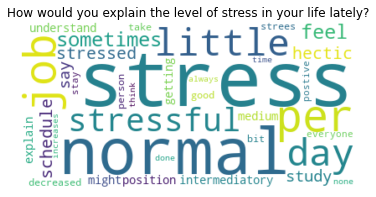

In [38]:
#wordcloud
text = " ".join(text.lower() for text in prev_dataset['stress_level1'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('stress_level1')])
plt.axis("off")
plt.show()

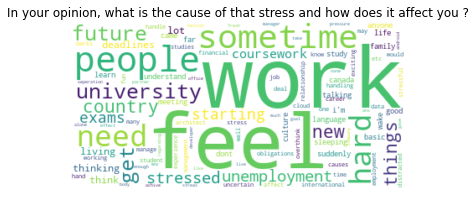

In [39]:
#wordcloud
text = " ".join(text.lower() for text in prev_dataset['stress_cause'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('stress_cause')])
plt.axis("off")
plt.show()

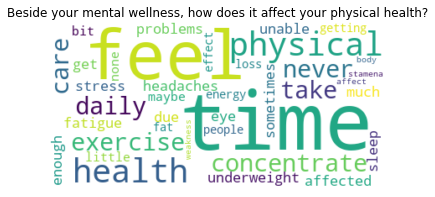

In [40]:
#wordcloud
text = " ".join(text.lower() for text in prev_dataset['physical_health'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('physical_health')])
plt.axis("off")
plt.show()

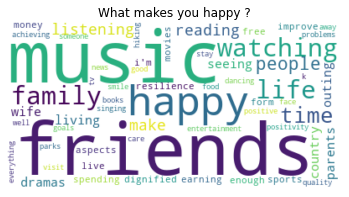

In [41]:
#wordcloud
text = " ".join(text.lower() for text in prev_dataset['happy_reason'].dropna())
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(orginal_columns[columns.index('happy_reason')])
plt.axis("off")
plt.show()

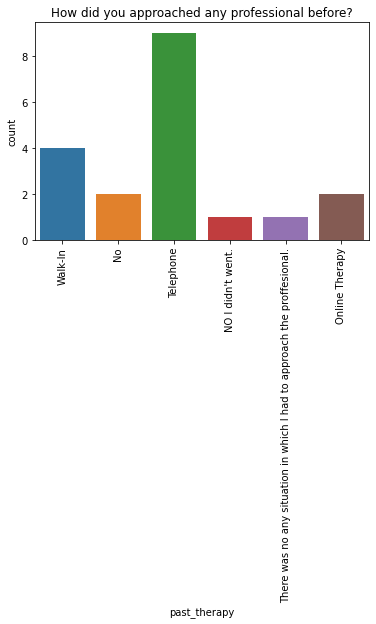

In [42]:
chart = sns.countplot('past_therapy', data =prev_dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(orginal_columns[columns.index('past_therapy')])
plt.show()

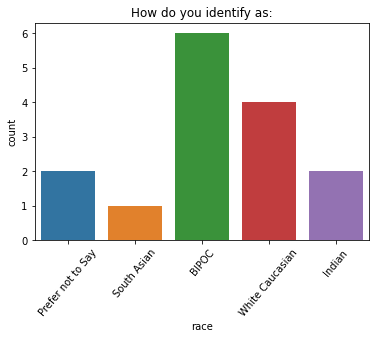

In [43]:
chart = sns.countplot(prev_dataset.race.dropna().apply(lambda x: x.strip()))
chart.set_xticklabels(chart.get_xticklabels(), rotation=50)
plt.title(orginal_columns[columns.index('race')])
plt.show()